In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
game = pd.read_csv("games.csv")
game.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


(array([45102.,     0., 11479.,  4695.,  9077.,  3829.,  4554.,  1097.,
         1078.,   401.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

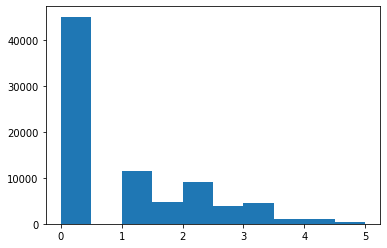

In [24]:
plt.hist(game['average_weight'])

In [3]:
game = game[game["users_rated"] > 0]
game = game.dropna(axis = 0)

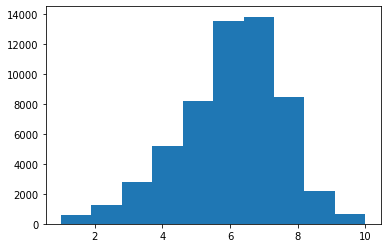

In [4]:
plt.hist(game["average_rating"])
plt.show()

In [5]:
columns = game.columns
columns = game[['yearpublished','maxplayers','playingtime','minplaytime','maxplaytime','minage','users_rated','total_owners','total_traders','total_wanters','total_wishers','total_comments','total_weights', 'average_weight']]
target = game['average_rating']
columns.head()

,yearpublished,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,180.0,180.0,180.0,13.0,20113,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,5.0,150.0,60.0,150.0,12.0,14383,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,7.0,210.0,30.0,210.0,12.0,9262,12230,99,1476,5600,1700,777,3.7761
3,2006.0,4.0,240.0,240.0,240.0,12.0,13294,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,5.0,150.0,90.0,150.0,12.0,39883,44362,795,861,5414,9173,5213,3.2943


In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(columns, target, test_size = 0.2)

In [14]:
model = LinearRegression()
model.fit(xTrain,yTrain)
pred_LR = model.predict(xTest)
print(pred_LR)

[5.24026747 6.51931243 6.18058176 ... 6.35244214 5.75186885 5.242288  ]


In [18]:
model1 = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
model1.fit(xTrain,yTrain)
pred_RF = model1.predict(xTest)
print(pred_RF)

[3.76853337 6.25514459 6.85192488 ... 6.24066417 7.19305763 4.98986913]


In [20]:
MSE_LR = mean_squared_error(pred_LR, yTest)
MSE_RF = mean_squared_error(pred_RF, yTest)
print(MSE_LR)
print(MSE_RF)


2.0981167132023297
1.463927304873194


In [21]:
r2_LR = r2_score(yTest, pred_LR)
r2_RF = r2_score(yTest, pred_RF)
print(r2_LR)
print(r2_RF)


0.15727861014156674
0.41200465862955093


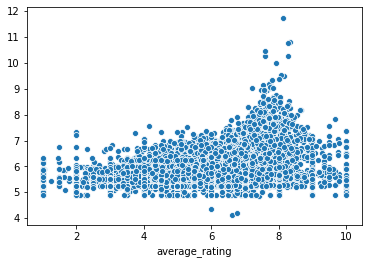

In [26]:
sns.scatterplot(yTest,pred_LR)

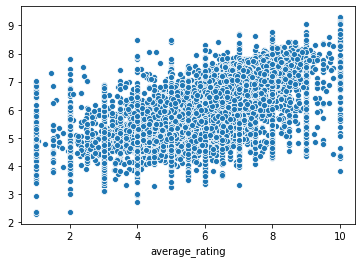

In [27]:
sns.scatterplot(yTest,pred_RF)